In [2]:
import os
import pandas as pd
import numpy as np
import torch
from imutils import paths
import imageio
import matplotlib.pyplot as plt

In [ ]:
image_paths[0].split(os.path.sep)[3]

In [ ]:
df_nrows = pd.read_csv("../data/train.csv")
df_last100 = df_nrows.tail(100)
df_last100.to_csv("toy_labels.csv")

In [3]:
labels = pd.read_csv("../data/toy_labels.csv").drop(['Unnamed: 0'],axis=1)
labels


,ID,Label
0,ab96813a-bbca-11e8-b2bc-ac1f6b6435d0,16|2|0
1,aca5b05a-bbca-11e8-b2bc-ac1f6b6435d0,16|13
2,acbf8b1a-bbca-11e8-b2bc-ac1f6b6435d0,7|0
3,aceb1aaa-bbca-11e8-b2bc-ac1f6b6435d0,16
4,ad3be804-bbca-11e8-b2bc-ac1f6b6435d0,12|0
...,...,...
95,dd0989c4-bbca-11e8-b2bc-ac1f6b6435d0,14
96,dd1f7fb8-bbca-11e8-b2bc-ac1f6b6435d0,3|0
97,dd5cb36a-bbca-11e8-b2bc-ac1f6b6435d0,14|0
98,df573730-bbca-11e8-b2bc-ac1f6b6435d0,14


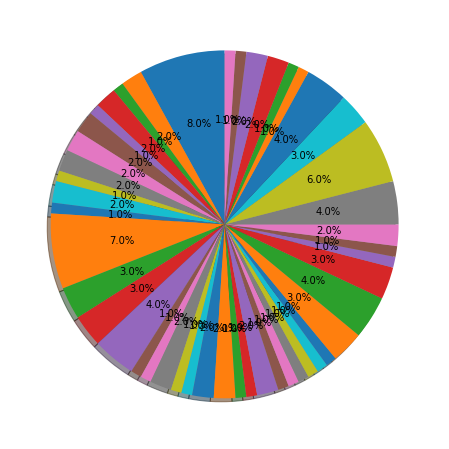

In [4]:
#labels['Label'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(labels.groupby('Label').size(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [5]:
# get all the image paths
image_paths = list(paths.list_images('../data/train_toy_data/'))
image_paths

['../data/train_toy_data/c9365c38-bbca-11e8-b2bc-ac1f6b6435d0_red.png',
 '../data/train_toy_data/daa22470-bbca-11e8-b2bc-ac1f6b6435d0_yellow.png',
 '../data/train_toy_data/c3995186-bbca-11e8-b2bc-ac1f6b6435d0_green.png',
 '../data/train_toy_data/cf968fa8-bbca-11e8-b2bc-ac1f6b6435d0_yellow.png',
 '../data/train_toy_data/c46c19fe-bbca-11e8-b2bc-ac1f6b6435d0_red.png',
 '../data/train_toy_data/aceb1aaa-bbca-11e8-b2bc-ac1f6b6435d0_green.png',
 '../data/train_toy_data/aec32eb2-bbca-11e8-b2bc-ac1f6b6435d0_yellow.png',
 '../data/train_toy_data/c128217a-bbca-11e8-b2bc-ac1f6b6435d0_green.png',
 '../data/train_toy_data/d52a06a2-bbca-11e8-b2bc-ac1f6b6435d0_green.png',
 '../data/train_toy_data/cee7f934-bbca-11e8-b2bc-ac1f6b6435d0_red.png',
 '../data/train_toy_data/b7b5879a-bbca-11e8-b2bc-ac1f6b6435d0_green.png',
 '../data/train_toy_data/c022e12a-bbca-11e8-b2bc-ac1f6b6435d0_green.png',
 '../data/train_toy_data/bbb8710e-bbca-11e8-b2bc-ac1f6b6435d0_red.png',
 '../data/train_toy_data/c477f314-bbca-11e8

In [21]:
img_arr_red = imageio.imread('../data/train_toy_data/c9365c38-bbca-11e8-b2bc-ac1f6b6435d0_red.png')
img_arr_blue = imageio.imread('../data/train_toy_data/c9365c38-bbca-11e8-b2bc-ac1f6b6435d0_blue.png')
img_arr_green = imageio.imread('../data/train_toy_data/c9365c38-bbca-11e8-b2bc-ac1f6b6435d0_green.png')
img_arr_yellow = imageio.imread('../data/train_toy_data/c9365c38-bbca-11e8-b2bc-ac1f6b6435d0_yellow.png')


### Full size original images (a mix of 1728x1728, 2048x2048 and 3072x3072 PNG files)

In [22]:
xred = torch.from_numpy(img_arr_red)
xblue = torch.from_numpy(img_arr_blue)
xgreen = torch.from_numpy(img_arr_green)
xyellow = torch.from_numpy(img_arr_yellow)


In [27]:
x = torch.stack((xred, xblue,xgreen,xyellow))
x.shape

torch.Size([4, 2048, 2048])

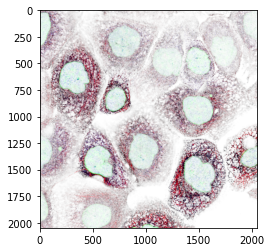

In [31]:
plt.imshow(x.permute(1, 2, 0))#permute in order to plot with matplotlib. Changes the order of the axes from
                              #C × H × W to H × W × C
plt.show()

In [10]:
# get all the image paths
train_folder = list(paths.list_images('../data/train_toy_data/'))

# split these path using a certain percentage
len_data = len(train_folder)
print(len_data)


400


In [42]:
ID =labels.iloc[0,0]
ID

'ab96813a-bbca-11e8-b2bc-ac1f6b6435d0'

In [58]:
import glob
x =[]

ID= "c9365c38-bbca-11e8-b2bc-ac1f6b6435d0"

pattern = f'../data/train_toy_data/*{str(ID)}_*.png'
files = glob.glob(pattern)
for file in files:
    img = imageio.imread(file)
    x.append(torch.from_numpy(img))

x = torch.stack(x)
x.shape

torch.Size([4, 2048, 2048])

In [12]:
# This is not coorect for our example, firat I have to stack the images same id.
train_size = 0.6

train_image_paths = train_folder[:int(len_data*train_size)]
test_image_paths = train_folder[int(len_data*train_size):]

In [19]:
train_folder[0].split()

['../data/train_toy_data/c9365c38-bbca-11e8-b2bc-ac1f6b6435d0_red.png']